In [33]:
import tensorflow as tf
import pandas as pd
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

print(gpus, tf.test.gpu_device_name())

[] 


In [6]:
FILE_PATH = '.\\data\\google-forms-data.csv'
color_columns = ['red', 'brown', 'yellow', 'cream', 'gray', 'white', 'black']

dataframe = pd.read_csv(FILE_PATH)

In [7]:
dataframe = dataframe.drop('age', axis=1)
dataframe = dataframe.drop('time', axis=1)

In [8]:
for color in color_columns:
  dataframe[color] = dataframe['colors'].apply(lambda x: 1 if color in x.split(';') else 0)

dataframe = dataframe.drop('colors', axis=1)

dataframe.head(), dataframe.shape

(   breedId  size  feeding  hairLength  hairTexture  grooming  shedding  \
 0       38     3        3           1            1         3         3   
 1        0     2        2           1            1         2         2   
 2       10     1        1           1            1         2         2   
 3        0     2        2           1            1         2         2   
 4       15     3        3           1            1         2         3   
 
    walking  playfulness  intelligence  ...  loudness  independence  \
 0        4            5             4  ...         2             4   
 1        3            4             3  ...         2             5   
 2        2            4             5  ...         4             5   
 3        4            5             5  ...         5             4   
 4        5            5             3  ...         3             4   
 
    defensiveness  red  brown  yellow  cream  gray  white  black  
 0              5    0      0       0      0     0   

In [9]:
dataframe.describe()

,breedId,size,feeding,hairLength,hairTexture,grooming,shedding,walking,playfulness,intelligence,...,loudness,independence,defensiveness,red,brown,yellow,cream,gray,white,black
count,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000,...,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000
mean,19.473480,3.031008,3.111791,2.649327,1.812525,2.778254,2.863729,3.763158,4.131783,4.169115,...,2.544880,3.143003,3.411057,0.133823,0.297430,0.154631,0.125663,0.112607,0.582823,0.512036
std,14.180678,1.203213,1.060382,1.309189,1.190892,1.287325,1.435193,1.110689,1.045083,0.939813,...,1.228415,1.326265,1.370747,0.340497,0.457174,0.361589,0.331503,0.316144,0.493143,0.499906
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,...,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,3.000000,3.000000,3.000000,1.000000,3.000000,3.000000,4.000000,4.000000,4.000000,...,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,29.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,49.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
dataframe.columns

Index(['breedId', 'size', 'feeding', 'hairLength', 'hairTexture', 'grooming',
       'shedding', 'walking', 'playfulness', 'intelligence', 'kidTolerance',
       'catTolerance', 'healthProblems', 'loudness', 'independence',
       'defensiveness', 'red', 'brown', 'yellow', 'cream', 'gray', 'white',
       'black'],
      dtype='object')

In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4902 entries, 0 to 4901
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   breedId         4902 non-null   int64
 1   size            4902 non-null   int64
 2   feeding         4902 non-null   int64
 3   hairLength      4902 non-null   int64
 4   hairTexture     4902 non-null   int64
 5   grooming        4902 non-null   int64
 6   shedding        4902 non-null   int64
 7   walking         4902 non-null   int64
 8   playfulness     4902 non-null   int64
 9   intelligence    4902 non-null   int64
 10  kidTolerance    4902 non-null   int64
 11  catTolerance    4902 non-null   int64
 12  healthProblems  4902 non-null   int64
 13  loudness        4902 non-null   int64
 14  independence    4902 non-null   int64
 15  defensiveness   4902 non-null   int64
 16  red             4902 non-null   int64
 17  brown           4902 non-null   int64
 18  yellow          4902 non-nul

In [12]:
dataframe['breedId'].value_counts()

breedId
12    346
16    294
2     260
1     226
20    187
7     177
19    176
9     175
4     169
10    165
23    150
42    143
15    133
21    127
13    127
26    106
48    104
0      95
44     86
5      82
37     81
17     80
14     77
49     75
43     70
45     70
36     70
29     67
6      63
46     62
11     60
8      60
3      57
18     53
31     51
24     49
30     45
38     44
35     44
25     42
47     42
41     41
33     38
39     35
28     35
40     35
32     34
22     33
27     31
34     30
Name: count, dtype: int64

In [13]:
desired_count_per_breed = 60

sampled_dataframe = pd.DataFrame(columns=dataframe.columns)

unique_breedIds = dataframe['breedId'].unique()
for breedId in unique_breedIds:
  subset = dataframe[dataframe['breedId'] == breedId]

  current_count = len(subset)

  if current_count > desired_count_per_breed:
    undersampled_subset = subset.sample(n=desired_count_per_breed, random_state=42)

    sampled_dataframe = pd.concat([sampled_dataframe, undersampled_subset])
  else:
    oversampled_subset = subset.sample(n=desired_count_per_breed, random_state=42, replace=True)

    sampled_dataframe = pd.concat([sampled_dataframe, oversampled_subset])

print(sampled_dataframe['breedId'].value_counts())

breedId
38    60
24    60
46    60
7     60
25    60
26    60
45    60
9     60
27    60
11    60
47    60
30    60
49    60
0     60
35    60
23    60
42    60
17    60
28    60
18    60
34    60
31    60
6     60
33    60
41    60
36    60
37    60
48    60
10    60
15    60
12    60
19    60
13    60
40    60
32    60
21    60
2     60
29    60
16    60
4     60
22    60
5     60
20    60
3     60
1     60
14    60
44    60
43    60
39    60
8     60
Name: count, dtype: int64


In [14]:
dataframe.head()

,breedId,size,feeding,hairLength,hairTexture,grooming,shedding,walking,playfulness,intelligence,...,loudness,independence,defensiveness,red,brown,yellow,cream,gray,white,black
0,38,3,3,1,1,3,3,4,5,4,...,2,4,5,0,0,0,0,0,1,1
1,0,2,2,1,1,2,2,3,4,3,...,2,5,2,0,1,0,0,0,0,1
2,10,1,1,1,1,2,2,2,4,5,...,4,5,4,0,1,0,0,0,0,0
3,0,2,2,1,1,2,2,4,5,5,...,5,4,5,0,0,0,0,0,0,1
4,15,3,3,1,1,2,3,5,5,3,...,3,4,2,0,1,0,0,0,0,0


In [15]:
max_value = 5

five_columns = set(sampled_dataframe.columns) - set(color_columns) - {'breedId'}
for column in five_columns:
  sampled_dataframe[column] = sampled_dataframe[column].sub(1).div(max_value - 1)

sampled_dataframe = sampled_dataframe.convert_dtypes()

In [16]:
sampled_dataframe

,breedId,size,feeding,hairLength,hairTexture,grooming,shedding,walking,playfulness,intelligence,...,loudness,independence,defensiveness,red,brown,yellow,cream,gray,white,black
3973,38,0.5,0.25,0.0,0.0,0.5,0.5,0.5,0.75,0.5,...,0.75,0.0,0.5,0,0,0,0,0,1,1
2121,38,0.75,1.0,0.0,0.0,0.0,0.0,0.75,1.0,1.0,...,0.75,0.25,0.25,0,1,1,0,0,1,1
898,38,0.75,0.5,0.0,0.0,0.5,0.5,0.75,0.75,0.75,...,0.5,0.75,1.0,0,1,0,0,0,1,0
4335,38,0.5,0.75,0.0,0.0,0.5,1.0,1.0,0.75,0.75,...,0.0,0.25,1.0,0,1,0,0,0,0,0
346,38,1.0,0.75,0.0,0.0,0.25,1.0,0.5,0.5,0.5,...,0.25,1.0,1.0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4831,8,0.5,0.5,0.25,0.0,0.25,0.25,1.0,1.0,1.0,...,0.0,0.5,0.75,0,0,1,0,1,1,1
4807,8,0.5,0.5,0.0,0.0,0.25,0.5,1.0,1.0,0.5,...,0.75,0.0,0.5,0,0,0,0,0,1,1
4788,8,0.5,0.5,0.25,0.25,0.0,0.75,1.0,0.75,0.75,...,0.75,0.25,0.25,0,0,1,0,1,1,1
4814,8,0.5,0.5,0.0,0.0,0.25,0.25,1.0,0.5,0.5,...,0.5,0.0,0.25,0,0,0,0,1,1,1


In [17]:
sampled_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 3973 to 4862
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   breedId         3000 non-null   Int64  
 1   size            3000 non-null   Float64
 2   feeding         3000 non-null   Float64
 3   hairLength      3000 non-null   Float64
 4   hairTexture     3000 non-null   Float64
 5   grooming        3000 non-null   Float64
 6   shedding        3000 non-null   Float64
 7   walking         3000 non-null   Float64
 8   playfulness     3000 non-null   Float64
 9   intelligence    3000 non-null   Float64
 10  kidTolerance    3000 non-null   Float64
 11  catTolerance    3000 non-null   Float64
 12  healthProblems  3000 non-null   Float64
 13  loudness        3000 non-null   Float64
 14  independence    3000 non-null   Float64
 15  defensiveness   3000 non-null   Float64
 16  red             3000 non-null   Int64  
 17  brown           3000 non-null   Int

In [18]:
X = sampled_dataframe.drop('breedId', axis=1)
y = sampled_dataframe['breedId']

X = np.asarray(X).astype('float64')
y = np.asarray(y).astype('int64')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
model = Sequential()

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='softmax'))

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

In [30]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

hist = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping_callback]
)

Epoch 1/100
71/71 [==============================] - 3s 11ms/step - loss: 3.7727 - accuracy: 0.1013 - val_loss: 3.5338 - val_accuracy: 0.2173
Epoch 2/100
71/71 [==============================] - 0s 6ms/step - loss: 3.1238 - accuracy: 0.2858 - val_loss: 2.7189 - val_accuracy: 0.3520
Epoch 3/100
71/71 [==============================] - 0s 6ms/step - loss: 2.3340 - accuracy: 0.4093 - val_loss: 2.1145 - val_accuracy: 0.4400
Epoch 4/100
71/71 [==============================] - 0s 6ms/step - loss: 1.8932 - accuracy: 0.4867 - val_loss: 1.8452 - val_accuracy: 0.5040
Epoch 5/100
71/71 [==============================] - 0s 6ms/step - loss: 1.6638 - accuracy: 0.5507 - val_loss: 1.6696 - val_accuracy: 0.5307
Epoch 6/100
71/71 [==============================] - 0s 6ms/step - loss: 1.5238 - accuracy: 0.5662 - val_loss: 1.5744 - val_accuracy: 0.5547
Epoch 7/100
71/71 [==============================] - 0s 6ms/step - loss: 1.4313 - accuracy: 0.5924 - val_loss: 1.5327 - val_accuracy: 0.5600
Epoch 8/100


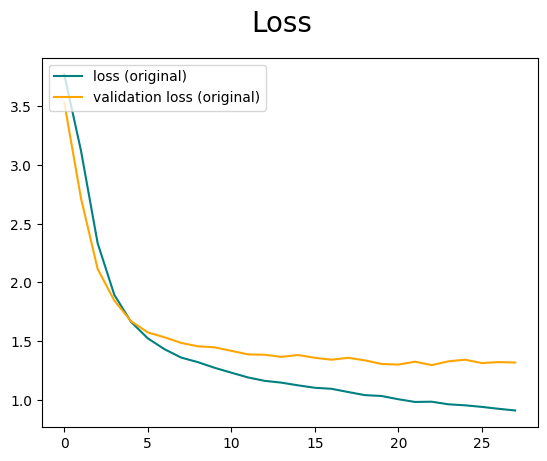

In [34]:
loss_fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss (original)')
plt.plot(hist.history['val_loss'], color='orange', label='validation loss (original)')
loss_fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [31]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 4ms/step - loss: 1.2956 - accuracy: 0.6160


[1.2955708503723145, 0.6159999966621399]

In [35]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Marci\AppData\Local\Temp\tmp8ubcozmp\assets


INFO:tensorflow:Assets written to: C:\Users\Marci\AppData\Local\Temp\tmp8ubcozmp\assets


In [36]:
with open('test_model.tflite', 'wb') as f:
    f.write(tflite_model)